In [1]:
import sys
sys.path.append('..')

In [2]:
from utils.dataloaders import create_dataloader
from utils.general import (LOGGER, TQDM_BAR_FORMAT, Profile, check_dataset, check_img_size, check_requirements,
                           check_yaml, coco80_to_coco91_class, colorstr, increment_path, non_max_suppression,
                           print_args, scale_boxes, xywh2xyxy, xyxy2xywh)

In [3]:
task = 'val'
dataset_yaml = "../datasets/T16bit_25k_09-03-2023/dataset.yaml"
#dataset_yaml = "../datasets/T8bit_minmax_25k_05-03-2023/dataset.yaml"
data = check_dataset(dataset_yaml)  # check

dataloader, dataset = create_dataloader(
    data[task], # 
    imgsz=640,
    batch_size=16,
    stride=1,
    single_cls=False,
    pad=0.5,
    rect=False,
    augment=False,
    prefix=colorstr(f'{task}: '))

val: Scanning /home/kevinserrano/GitHub/yolov5-extended/datasets/T16bit_25k_09-03-2023/labels/val.cache... 7341 images, 390 backgrounds, 2 corrupt: 100%|██████████| 7341/7341 00:00
val: WARNING ⚠️ /home/kevinserrano/GitHub/yolov5-extended/datasets/T16bit_25k_09-03-2023/images/val/0k_1354692_r.png: 12 duplicate labels removed
val: WARNING ⚠️ /home/kevinserrano/GitHub/yolov5-extended/datasets/T16bit_25k_09-03-2023/images/val/1d_9120754_l.png: 2 duplicate labels removed
val: WARNING ⚠️ /home/kevinserrano/GitHub/yolov5-extended/datasets/T16bit_25k_09-03-2023/images/val/6z_1355074_r.png: 3 duplicate labels removed
val: WARNING ⚠️ /home/kevinserrano/GitHub/yolov5-extended/datasets/T16bit_25k_09-03-2023/images/val/cl_1354653_r.png: 84 duplicate labels removed
val: WARNING ⚠️ /home/kevinserrano/GitHub/yolov5-extended/datasets/T16bit_25k_09-03-2023/images/val/ll_1333457_l.png: ignoring corrupt image/label: negative label values [  -0.027344   -0.017188]
val: WARNING ⚠️ /home/kevinserrano/GitHub

torch.Size([3, 640, 640]) torch.Size([0, 6]) 640 512 (64.0, 0.0)


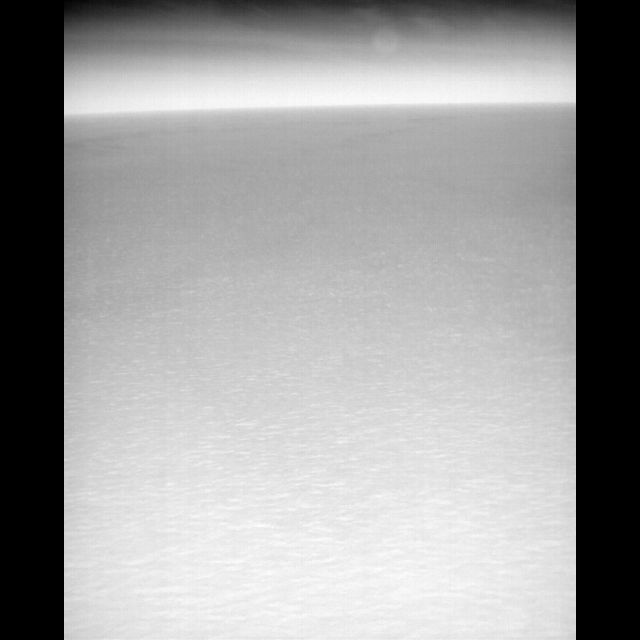

In [4]:
import numpy as np
import cv2
from PIL import Image

for img, labels, im_file, ((h0, w0), (_, pad)) in dataset:
    print(img.shape, labels.shape, h0, w0, pad)
    break

Image.fromarray(img[0].numpy()) #.transpose(1,2,0).astype(np.uint8))

im.dtype=dtype('uint16'), np.ma.minimum_fill_value(im)=65535, np.ma.maximum_fill_value(im)=0


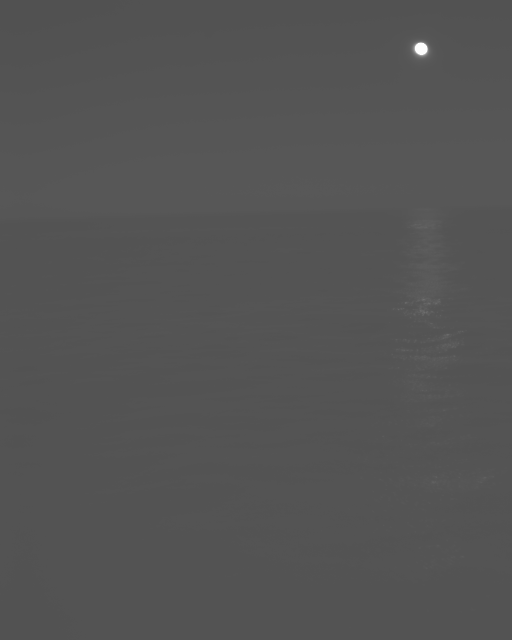

In [5]:
import numpy as np
import cv2

im_fpath = '/mnt/fiftyoneDB/Database/Image_Data/Thermal_Images_16Bit/Trip_310_Seq_153/23714953_r.png'
im = cv2.imread(im_fpath, cv2.IMREAD_UNCHANGED)
print(f"{im.dtype=}, {np.ma.minimum_fill_value(im)=}, {np.ma.maximum_fill_value(im)=}")
Image.fromarray(im)

[     251.51       63.75      230.95      26.678      8.4102      187.73      193.96      250.78    0.027475]


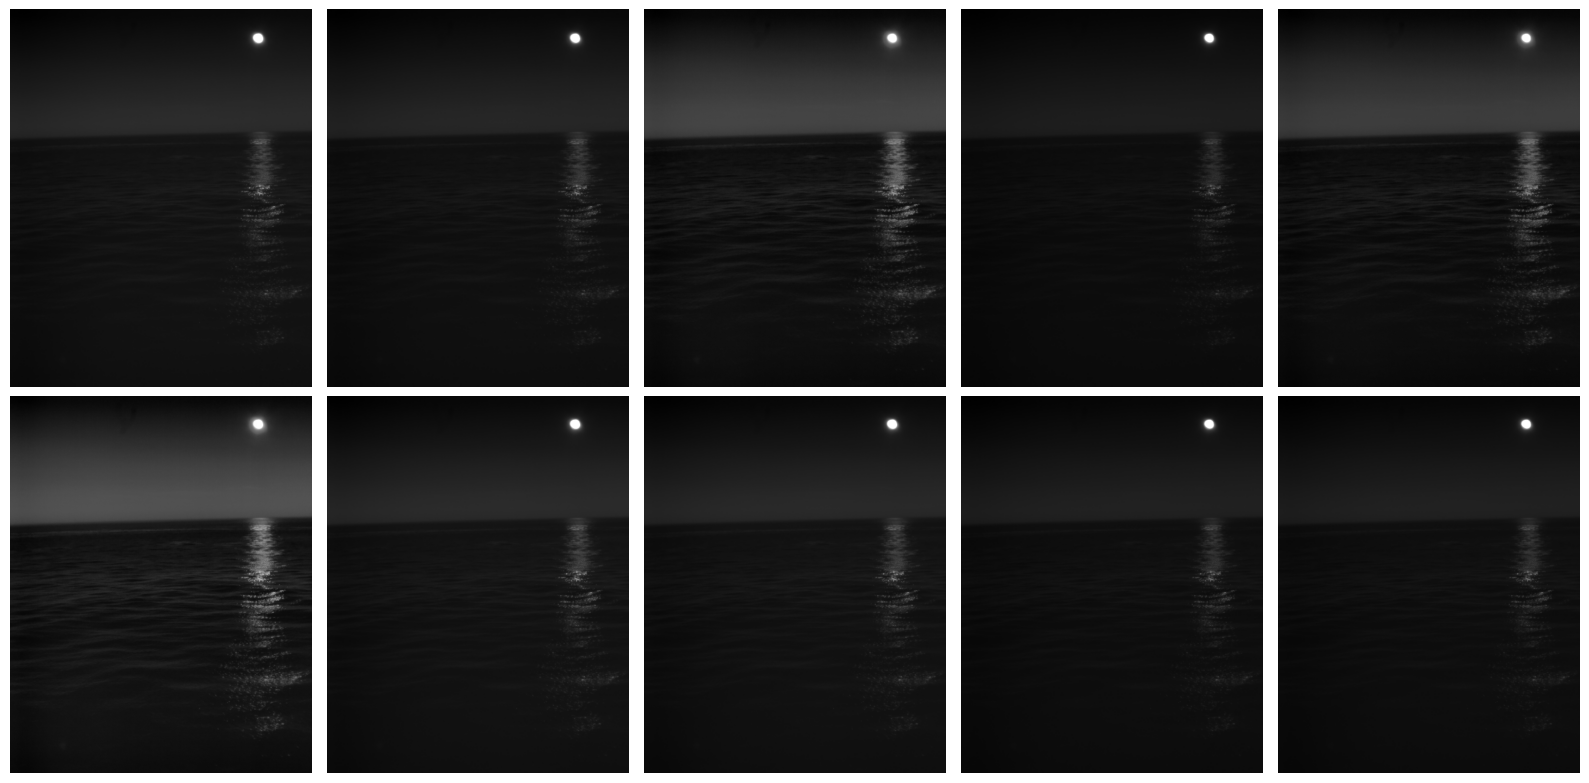

In [6]:
import matplotlib.pyplot as plt
from utils.augmentations16 import convert_16bit_to_8bit

ims = [convert_16bit_to_8bit(im, augment=True) for _ in range(10)]
diffs = np.diff(np.array(ims), axis=0)
print(diffs.mean(axis=(1,2,3)))
# plot images in 4x4 grid
fig, axs = plt.subplots(2, 5, figsize=(16, 8))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(ims[i], cmap='gray')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [7]:
import numpy as np
import cv2
from PIL import Image
import glob
import random
import os

data_dir = "./datasets/T16bit_25k_09-03-2023/images/val/"
img_fpaths = glob.glob(os.path.join(data_dir, "*.png"))

In [8]:
def vis_16bit(img, pad):
    pad = np.array(pad, dtype=int)
    img = img[0].numpy()
    h, w = img.shape
    # unpad
    img = img[..., pad[1]:h-pad[1], pad[0]:w-pad[0]]
    print(img.shape)
    # img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    # pad again
    print(img.shape)
    return np.pad(img, ((pad[1], pad[1]), (pad[0], pad[0])), 'constant', constant_values=0)

# Image.fromarray(vis_16bit(img, pad)) #.transpose(1,2,0).astype(np.uint8))